# Кот Алексей Владимирович М20-ЯЭ
## Лабораторная работа № 3
### Вариант 32
#### Набор данных: 9 классификаторы - 1,3



#### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

## 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт):

#### Эксперименты проводились с группой из 30 добровольцев в возрасте от 19 до 48 лет. Каждый человек выполнял шесть действий (ХОДЬБА, ПОДЪЁМ ПО ЛЕСТНИЦЕ, СПУСК ПО ЛЕСТНИЦЕ, СИДЕНИЕ, СТОЯНИЕ, ЛЕЖАНИЕ), надевая смартфон (Samsung Galaxy S II) на талию. Используя встроенный акселерометр и гироскоп, было зафиксировано 3-осевое линейное ускорение и 3-осевая угловая скорость с постоянной частотой 50 Гц. Эксперименты были записаны на видео, чтобы маркировать данные вручную. Полученный набор данных был случайным образом разделен на два набора, где 70% добровольцев были отобраны для генерации обучающих данных и 30% тестовых данных.

### Mean: среднее значение
### Std: стандартное отклонение
### Mad: медианное абсолютное отклонение
### Max: наибольшее значение в массиве
### Min: наименьшее значение в массиве
### Sma: область величины сигнала
### Energy: мера энергии. Сумма квадратов делится на количество значений.
### Iqr: межквартильный размах
### Entropy: энтропия сигнала
### ArCoeff: коэффициенты авторегрессии с порядком Бурга равным 4
### Correlation: коэффициент корреляции между двумя сигналами
### MaxInds: индекс частотной составляющей с наибольшей величиной
### MeanFreq: средневзвешенное значение частотных составляющих для получения средней частоты
### Skewness: асимметрия сигнала в частотной области
### Kurtosis: эксцесс сигнала в частотной области
### BandsEnergy: энергия частотного интервала в пределах 64 ячеек БПФ каждого окна.
### Angle: угол между векторами to.


In [145]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing

x_test = pd.read_csv('X_test.txt', header=None, delimiter=r"\s+")
y_test = pd.read_csv('y_test.txt')
y_train = pd.read_csv('y_train.txt')
x_train = pd.read_csv('X_train.txt', header=None, delimiter=r"\s+")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7352, 561)
(7352, 1)
(2947, 561)
(2947, 1)


#### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [146]:
len1 = len(x_test)
df.drop_duplicates(keep='first',inplace=True)
len2 = len(x_test)
print("Всего удалено дубликатов:" ,len1 - len2)

Всего удалено дубликатов: 0


#### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

In [147]:
y_train.nunique()

5    6
dtype: int64

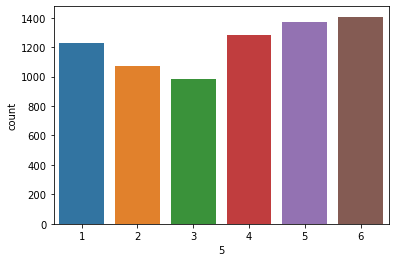

In [148]:
sns.countplot(data=y_train, x='5')
plt.show()

### Данные имеют небольшое отклонение от среднего значения
    

#### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [151]:
# Масштабирование тренировочной выборки.
normalized_features_train = preprocessing.normalize(y_train, axis=0, norm='max')
normalized_features_train = pd.DataFrame(normalized_features_train)
normalized_features_train
# Масштабировнаие по максимальному занчению в строке (0-строка)

,0
0,0.833333
1,0.833333
2,0.833333
3,0.833333
4,0.833333
...,...
7347,0.333333
7348,0.333333
7349,0.333333
7350,0.333333


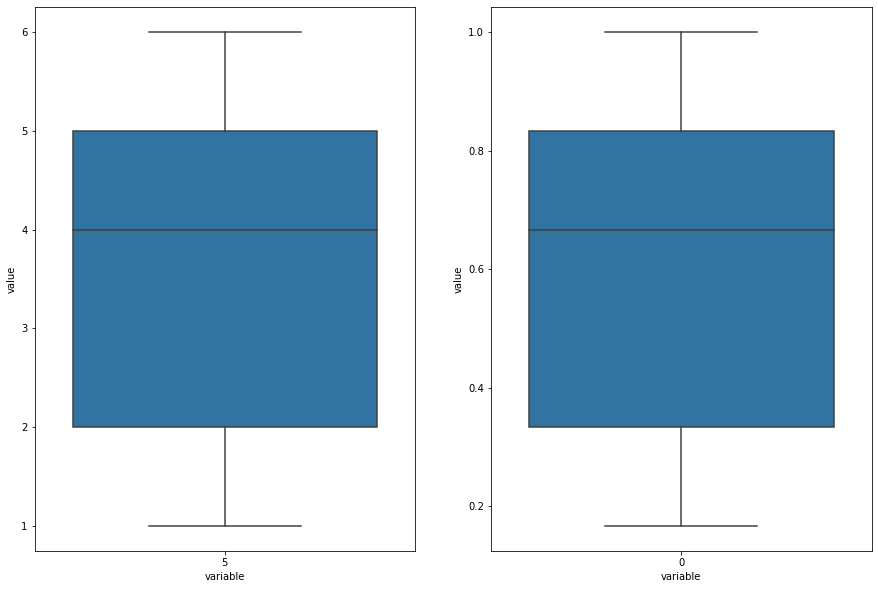

In [153]:
# Диаграммы BoxPlot до и после масштабирования для тренировочной выборки.
from matplotlib import pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(y_train), ax=axes[0])#для 1го поля вывода области графика
sns.boxplot(x="variable", y="value", data=pd.melt(normalized_features_train), ax=axes[1]);#для 2го поля вывода области графика

#### 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены

Категориальных признаков нет.

#### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

<AxesSubplot:>

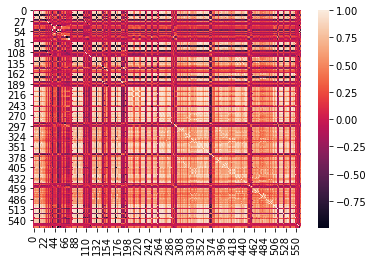

In [138]:
corr = x_train.corr()
sns.heatmap(corr)

#### 7.	Заполните пропущенные значения в данных

In [139]:
x_train.dropna()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


Нет данных, которые имеют пропущенные значения

#### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию

#### 1 - классификатор K ближайших соседей (задаётся количество ближайших объектов)

In [140]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
y_train = y_train.values.ravel()

In [141]:
kneignors = KNeighborsClassifier()

search = GridSearchCV(kneignors, {'n_neighbors': [x for x in range(1, 50)]})
search.fit(x_train, y_train)

n = search.best_estimator_.n_neighbors
best = search.best_score_
print('best:', best, ', neighbors num:', n, sep=' ')

kneignors = KNeighborsClassifier(n_neighbors=n)
kneignors.fit(x_train, y_train)
knn_predict = kneignors.predict(x_test)
print('Accuracy knn: %.5f' % accuracy_score(y_test, knn_predict))

best: 0.8698351345976867 , neighbors num: 16
Accuracy knn: 0.87173


#### 3 – линейный классификатор (персептрон);

In [142]:
ppn = Perceptron()
search = GridSearchCV(estimator=ppn, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [x for x in range(1, 50)],
}, n_jobs=-1)
search.fit(x_train, y_train)
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print(' best:', best,"\n",'alpha:', alpha,"\n", 'max_iter:', max_iter)

ppn = Perceptron(alpha=alpha, max_iter=max_iter)
ppn.fit(x_train, y_train)
ppn_predict = ppn.predict(x_test)
print(' Accuracy ppn: %.5f' % accuracy_score(y_test, ppn_predict))

D:\Winpython\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


 best: 0.8726919074903925 
 alpha: 0.05263157894736842 
 max_iter: 9
 Accuracy ppn: 0.80556


D:\Winpython\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
